In [4]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import xarray as xr
import datetime as dt
from netCDF4 import date2num,num2date
import cftime
from math import sqrt
import matplotlib.pyplot as plt 
import sys
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import manifold
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE

from mwdc.preprocessing import preprocessing
from mwdc.evaluation import st_evaluation
from mwdc.visualization import visualization

from sklearn.metrics import silhouette_score, davies_bouldin_score

import dask.dataframe

In [10]:
from mwdc.preprocessing import preprocessing

#### Reading .nc Data

In [6]:
path = ('../../data/ERA5_meteo_sfc_2021_daily.nc')
data = xr.open_dataset(path, decode_times=False) 
data

<xarray.Dataset>
Dimensions:    (time: 365, longitude: 41, latitude: 41)
Coordinates:
  * time       (time) float64 0.0 1.0 2.0 3.0 4.0 ... 361.0 362.0 363.0 364.0
  * longitude  (longitude) float32 -33.0 -32.75 -32.5 ... -23.5 -23.25 -23.0
  * latitude   (latitude) float32 43.0 42.75 42.5 42.25 ... 33.5 33.25 33.0
Data variables:
    sp         (time, latitude, longitude) float64 ...
    sst        (time, latitude, longitude) float64 ...
    u10        (time, latitude, longitude) float64 ...
    v10        (time, latitude, longitude) float64 ...
    sshf       (time, latitude, longitude) float64 ...
    slhf       (time, latitude, longitude) float64 ...
    t2m        (time, latitude, longitude) float64 ...
Attributes:
    title:          Daily variables from ERA5 hourly data
    history:        Wed Mar 23 12:01:11 2022: ncrcat ERA5_meteo_sfc_2021_01-0...
    Input dataset:  /global/cscratch1/sd/xzheng/ENA/rawdata/ERA5_meteo_sfc_20...
    NCO:            netCDF Operators version 5.0.1 (Homepage = http://nco.sf....

## Preprocessing 

#### Transforming data
- This function is used to transform the xarray dataset into a pandas dataframe where the dimension "time" would become the index of the DataFrame and, pairs of both dimensions "latitude" and "longitude" will become the columns for each variable

#### Preprocessing Real data

In [ ]:
tf_data = preprocessing.datatransformation(data)


In [24]:
tf_data = preprocessing.datatransformation(data)

tf_data

,"sp(43.0,-33.0)","sp(42.75,-33.0)","sp(42.5,-33.0)","sp(42.25,-33.0)","sp(42.0,-33.0)","sp(41.75,-33.0)","sp(41.5,-33.0)","sp(41.25,-33.0)","sp(41.0,-33.0)","sp(40.75,-33.0)",...,"t2m(35.25,-23.0)","t2m(35.0,-23.0)","t2m(34.75,-23.0)","t2m(34.5,-23.0)","t2m(34.25,-23.0)","t2m(34.0,-23.0)","t2m(33.75,-23.0)","t2m(33.5,-23.0)","t2m(33.25,-23.0)","t2m(33.0,-23.0)"
0.0,102443.676498,102431.303226,102417.453815,102405.135686,102391.629859,102376.995718,102354.929979,102331.617157,102306.463402,102286.930005,...,290.000848,290.122430,290.264916,290.442410,290.577520,290.716088,290.867770,291.004767,291.069088,291.095877
1.0,101345.768122,101317.220943,101287.358812,101259.804210,101229.348230,101197.229473,101161.144651,101128.482946,101095.235875,101068.601739,...,290.632579,290.666912,290.741103,290.869634,290.979348,291.094496,291.188648,291.258157,291.281510,291.312004
2.0,100624.067447,100584.979445,100543.863872,100504.640134,100464.109927,100422.816199,100374.396282,100326.188453,100276.279671,100234.684777,...,290.797767,290.884106,290.933596,290.999557,291.061465,291.153361,291.255193,291.347718,291.426658,291.535552
3.0,100114.540603,100040.682731,99966.880003,99897.586286,99832.547075,99775.380607,99718.328667,99667.461243,99619.999967,99586.044519,...,290.893986,290.875573,290.855689,290.940658,291.090622,291.246660,291.372272,291.492091,291.587344,291.698686
4.0,100697.759889,100618.637969,100538.930682,100461.853300,100384.593521,100308.381461,100226.426032,100147.134440,100068.479115,99995.435665,...,290.343238,290.741350,290.962192,291.019160,291.073186,291.165834,291.315630,291.485410,291.615917,291.696002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360.0,98843.817016,98872.778201,98904.362934,98940.904619,98979.865525,99023.685306,99065.608941,99111.557801,99163.068418,99225.224426,...,292.431912,292.528418,292.677360,292.888889,293.059160,293.161395,293.232289,293.256524,293.238473,293.260666
361.0,98579.721408,98638.305796,98693.424812,98748.838058,98802.518619,98855.263365,98898.519207,98940.773850,98981.140520,99028.262212,...,292.397667,292.426311,292.512561,292.647280,292.745454,292.810912,292.857479,292.888796,292.889274,292.907499
362.0,98894.706481,98944.369990,98993.923163,99046.639304,99101.378273,99158.916511,99210.345398,99260.842557,99311.495004,99370.504390,...,292.438388,292.575405,292.739702,292.944218,293.099881,293.206281,293.277760,293.320371,293.326403,293.347126
363.0,98648.542535,98667.708326,98687.585171,98714.294683,98744.252980,98774.538199,98798.971517,98822.415897,98845.627345,98877.167126,...,292.060683,292.187234,292.369033,292.632800,292.846336,293.011309,293.129716,293.204905,293.263513,293.294713


In [33]:
non_norm_tf_data = tf_data
# Normalizing data
tf_data = preprocessing.datanormalization(tf_data)


In [34]:
tf_data

,"sp(43.0,-33.0)","sp(42.75,-33.0)","sp(42.5,-33.0)","sp(42.25,-33.0)","sp(42.0,-33.0)","sp(41.75,-33.0)","sp(41.5,-33.0)","sp(41.25,-33.0)","sp(41.0,-33.0)","sp(40.75,-33.0)",...,"t2m(35.25,-23.0)","t2m(35.0,-23.0)","t2m(34.75,-23.0)","t2m(34.5,-23.0)","t2m(34.25,-23.0)","t2m(34.0,-23.0)","t2m(33.75,-23.0)","t2m(33.5,-23.0)","t2m(33.25,-23.0)","t2m(33.0,-23.0)"
0.0,0.769017,0.763551,0.758399,0.754214,0.749653,0.744597,0.739195,0.733298,0.726633,0.719377,...,0.307300,0.312956,0.318721,0.328563,0.334153,0.337154,0.340863,0.343122,0.338263,0.331969
1.0,0.550508,0.539280,0.528615,0.520168,0.510767,0.500749,0.491037,0.481886,0.472325,0.462340,...,0.366677,0.364151,0.363580,0.368759,0.371705,0.372464,0.370914,0.367119,0.358756,0.353140
2.0,0.406872,0.391876,0.377439,0.365852,0.353486,0.340685,0.327491,0.314235,0.300378,0.286403,...,0.382203,0.384572,0.381714,0.380983,0.379379,0.377956,0.377146,0.375601,0.372759,0.375038
3.0,0.305465,0.282306,0.260121,0.241803,0.223679,0.206865,0.191111,0.176584,0.162586,0.149556,...,0.391246,0.383770,0.374375,0.375442,0.382104,0.386662,0.388110,0.389274,0.388262,0.391018
4.0,0.421539,0.398652,0.376436,0.357109,0.337143,0.317032,0.296732,0.276819,0.256749,0.235928,...,0.339481,0.371150,0.384408,0.382828,0.380475,0.379120,0.382806,0.388641,0.391018,0.390756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360.0,0.052561,0.047201,0.044078,0.046307,0.048426,0.051497,0.055427,0.060420,0.066650,0.073432,...,0.535796,0.539179,0.545987,0.558745,0.566072,0.565328,0.562305,0.556372,0.547556,0.544027
361.0,0.000000,0.000000,0.001187,0.007059,0.011975,0.016685,0.020693,0.024733,0.028452,0.031877,...,0.532577,0.529579,0.530462,0.536012,0.536755,0.532624,0.527203,0.521547,0.513866,0.509431
362.0,0.062689,0.061612,0.062288,0.067914,0.073401,0.079448,0.085514,0.091616,0.097813,0.104082,...,0.536404,0.543597,0.551860,0.563950,0.569878,0.569516,0.566563,0.562419,0.556039,0.552496
363.0,0.013697,0.005919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500904,0.507099,0.516941,0.534650,0.546183,0.551323,0.552699,0.551484,0.549971,0.547362


#### Preprocessing single variable (SST)

In [ ]:
data_single_var = data
data_single_var = data_single_var.drop('t2m')
data_single_var = data_single_var.drop('slhf')
data_single_var = data_single_var.drop('sshf')
data_single_var = data_single_var.drop('v10')
data_single_var = data_single_var.drop('u10')
data_single_var = data_single_var.drop('sp')

data_single_var

<xarray.Dataset>
Dimensions:    (time: 365, longitude: 41, latitude: 41)
Coordinates:
  * time       (time) float64 0.0 1.0 2.0 3.0 4.0 ... 361.0 362.0 363.0 364.0
  * longitude  (longitude) float32 -33.0 -32.75 -32.5 ... -23.5 -23.25 -23.0
  * latitude   (latitude) float32 43.0 42.75 42.5 42.25 ... 33.5 33.25 33.0
Data variables:
    sst        (time, latitude, longitude) float64 290.1 290.0 ... 293.4 293.3
Attributes:
    title:          Daily variables from ERA5 hourly data
    history:        Wed Mar 23 12:01:11 2022: ncrcat ERA5_meteo_sfc_2021_01-0...
    Input dataset:  /global/cscratch1/sd/xzheng/ENA/rawdata/ERA5_meteo_sfc_20...
    NCO:            netCDF Operators version 5.0.1 (Homepage = http://nco.sf....

In [ ]:
tf_sst_data = preprocessing.datatransformation(data_single_var)
tf_sst_data

,"sst(43.0,-33.0)","sst(42.75,-33.0)","sst(42.5,-33.0)","sst(42.25,-33.0)","sst(42.0,-33.0)","sst(41.75,-33.0)","sst(41.5,-33.0)","sst(41.25,-33.0)","sst(41.0,-33.0)","sst(40.75,-33.0)",...,"sst(35.25,-23.0)","sst(35.0,-23.0)","sst(34.75,-23.0)","sst(34.5,-23.0)","sst(34.25,-23.0)","sst(34.0,-23.0)","sst(33.75,-23.0)","sst(33.5,-23.0)","sst(33.25,-23.0)","sst(33.0,-23.0)"
0.0,290.120809,290.198989,290.163838,289.908009,289.776023,289.416485,289.279786,289.298749,289.412232,289.612776,...,292.574080,292.498104,292.416313,292.350892,292.321388,292.353764,292.406358,292.468126,292.535987,292.600670
1.0,290.079384,290.077223,290.026065,289.839130,289.695864,289.328392,289.194537,289.201049,289.294831,289.487051,...,292.453081,292.446389,292.388831,292.292610,292.249929,292.284439,292.348647,292.434885,292.529030,292.617443
2.0,289.852013,289.914604,289.911355,289.774294,289.640830,289.323623,289.225770,289.269552,289.370277,289.552165,...,292.283477,292.329824,292.275278,292.176198,292.131204,292.163175,292.246123,292.350501,292.443391,292.535904
3.0,289.723889,289.820934,289.819498,289.687540,289.494497,289.156347,289.109373,289.139239,289.313556,289.628588,...,292.221876,292.467317,292.448424,292.259843,292.151310,292.011446,292.083685,292.356901,292.505577,292.577510
4.0,289.885672,290.112513,290.180598,290.013991,289.699503,289.233230,289.169244,289.194356,289.440634,289.745181,...,292.065796,292.313719,292.325013,292.150905,292.053275,291.947377,292.027871,292.276171,292.448090,292.559649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360.0,289.489953,289.579523,289.676942,289.729824,289.775556,289.700285,289.696682,289.980434,290.145347,290.183858,...,292.046897,292.095863,292.210913,292.492743,292.851638,293.121902,293.358725,293.522129,293.513968,293.536428
361.0,289.552235,289.658312,289.777707,289.838365,289.739096,289.638772,289.630882,289.779872,289.968499,290.342562,...,292.012217,291.971526,292.138619,292.510788,292.859457,293.116775,293.344155,293.515763,293.530489,293.515891
362.0,289.467150,289.556451,289.710454,289.841128,289.798871,289.689019,289.597269,289.627577,289.851696,290.304705,...,291.997647,292.015336,292.195190,292.554042,292.955437,293.227510,293.397408,293.512188,293.469660,293.419185
363.0,289.414596,289.608265,289.756557,289.809126,289.658526,289.645622,289.583041,289.649582,289.875481,290.261779,...,291.896725,291.912264,292.118893,292.544243,292.924730,293.182091,293.332932,293.442115,293.467424,293.499726


In [ ]:
# Normalizing data
tf_sst_data = preprocessing.datanormalization(tf_sst_data)
tf_sst_data

,"sst(43.0,-33.0)","sst(42.75,-33.0)","sst(42.5,-33.0)","sst(42.25,-33.0)","sst(42.0,-33.0)","sst(41.75,-33.0)","sst(41.5,-33.0)","sst(41.25,-33.0)","sst(41.0,-33.0)","sst(40.75,-33.0)",...,"sst(35.25,-23.0)","sst(35.0,-23.0)","sst(34.75,-23.0)","sst(34.5,-23.0)","sst(34.25,-23.0)","sst(34.0,-23.0)","sst(33.75,-23.0)","sst(33.5,-23.0)","sst(33.25,-23.0)","sst(33.0,-23.0)"
0.0,0.277382,0.278881,0.258121,0.238704,0.203745,0.166139,0.140511,0.154529,0.145160,0.146470,...,0.323063,0.297638,0.266496,0.220348,0.182856,0.162071,0.179624,0.188698,0.187435,0.191987
1.0,0.271699,0.262313,0.240006,0.230049,0.193627,0.155130,0.129881,0.142990,0.131470,0.131819,...,0.308363,0.291336,0.263035,0.212799,0.173478,0.152879,0.172126,0.184331,0.186509,0.194223
2.0,0.240507,0.240187,0.224924,0.221902,0.186680,0.154535,0.133776,0.151081,0.140268,0.139407,...,0.287759,0.277129,0.248735,0.197720,0.157897,0.136800,0.158805,0.173245,0.175106,0.183355
3.0,0.222930,0.227442,0.212846,0.211001,0.168209,0.133631,0.119261,0.135690,0.133653,0.148313,...,0.280275,0.293886,0.270540,0.208555,0.160535,0.116681,0.137699,0.174086,0.183386,0.188900
4.0,0.245124,0.267115,0.260324,0.252021,0.194086,0.143239,0.126727,0.142200,0.148472,0.161899,...,0.261313,0.275167,0.254999,0.194444,0.147670,0.108185,0.130448,0.163480,0.175731,0.186520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360.0,0.190837,0.194594,0.194103,0.216314,0.203687,0.201603,0.192497,0.235040,0.230651,0.213018,...,0.259017,0.248616,0.240630,0.238721,0.252444,0.263926,0.303364,0.327171,0.317654,0.316705
361.0,0.199381,0.205315,0.207352,0.229953,0.199084,0.193916,0.184292,0.211353,0.210028,0.231512,...,0.254804,0.233462,0.231525,0.241058,0.253470,0.263246,0.301471,0.326335,0.319854,0.313967
362.0,0.187708,0.191455,0.198509,0.230300,0.206630,0.200195,0.180101,0.193366,0.196408,0.227100,...,0.253034,0.238802,0.238649,0.246661,0.266066,0.277929,0.308390,0.325865,0.311755,0.301078
363.0,0.180499,0.198505,0.204571,0.226279,0.188914,0.194772,0.178327,0.195965,0.199181,0.222098,...,0.240773,0.226240,0.229041,0.245392,0.262036,0.271906,0.300013,0.316659,0.311457,0.311813


## Dimension Reduction

### KernelPCA

- Kernel PCA is a non-linear dimensionality reduction technique that uses kernels. It can also be considered as the non-linear form of normal PCA.

#### Finding the proper number of components for Kernel PCA

##### Number of components for single variable data

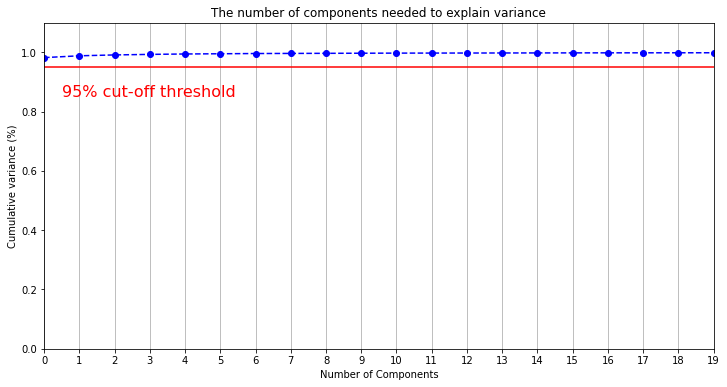

In [ ]:
preprocessing.pcacomponents(tf_sst_data)

Based on the plot above the best number of components for single variable data is 2.

##### Number of components for real data

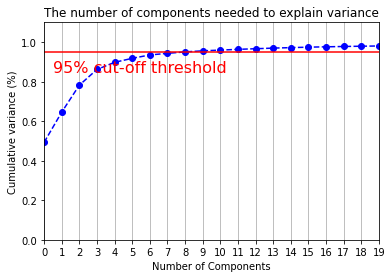

In [ ]:
preprocessing.pcacomponents(tf_data)

Based on the plot above the best number of components for real data is 15.

#### Applying KernelPCA for single variable data

In [ ]:
kpca = KernelPCA(n_components=2, kernel='rbf')
Single_var_kpca = kpca.fit_transform(tf_sst_data)
Single_var_kpca

array([[-0.38682937,  0.01653366],
       [-0.38874364,  0.01865475],
       [-0.38725131,  0.0165932 ],
       [-0.39266928,  0.02011662],
       [-0.39267865,  0.02166358],
       [-0.40392655,  0.03300704],
       [-0.40792711,  0.03657818],
       [-0.41163325,  0.04098361],
       [-0.41475626,  0.04524681],
       [-0.42515426,  0.05352204],
       [-0.42147957,  0.05041709],
       [-0.41191487,  0.04080906],
       [-0.41353938,  0.04274795],
       [-0.41033205,  0.03884047],
       [-0.41393821,  0.04396349],
       [-0.41615945,  0.04489178],
       [-0.41383648,  0.04288752],
       [-0.41880513,  0.04795289],
       [-0.41145544,  0.04111266],
       [-0.41184854,  0.04171151],
       [-0.41392308,  0.04320767],
       [-0.41322801,  0.04093944],
       [-0.41320414,  0.04099516],
       [-0.41258872,  0.03945008],
       [-0.41044809,  0.03681742],
       [-0.40963596,  0.03729266],
       [-0.41500061,  0.04199648],
       [-0.42325975,  0.04832702],
       [-0.41753068,

In [ ]:
Single_var_kpca.shape

(365, 1)

#### Applying KernelPCA for real data

In [9]:
kpca = KernelPCA(n_components=16, kernel='rbf')
real_kpca = kpca.fit_transform(tf_data)
real_kpca


array([[ 0.18079048, -0.07575304, -0.05554408, ..., -0.01693787,
         0.01967535, -0.02978596],
       [ 0.18604405,  0.01755846, -0.02514849, ...,  0.00601374,
         0.01831528, -0.02749639],
       [ 0.18978488,  0.11251013,  0.01914892, ...,  0.04029303,
         0.02179862,  0.00064807],
       ...,
       [ 0.17797391,  0.24370379,  0.09322344, ...,  0.03056805,
        -0.00178476,  0.01243627],
       [ 0.19620549,  0.26354036,  0.17241536, ...,  0.03287361,
         0.00750907, -0.03181158],
       [ 0.19917055,  0.20128299,  0.26612819, ...,  0.03885298,
         0.02391195, -0.02284425]])

##### Correlation Heatmap

In [18]:
df_real_kpca = pd.DataFrame(real_kpca)
kpca_corr_matrix = df_real_kpca.corr()
kpca_corr_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.000000e+00,5.555381e-17,7.294844e-17,1.025003e-16,0.000000e+00,7.736565e-17,4.372011e-17,1.909093e-17,-2.257972e-17,-1.153676e-16,7.992248e-17,-4.785521e-17,-1.071415e-16,-4.039613e-17,-2.131270e-18,-9.094303e-18
1,5.555381e-17,1.000000e+00,-4.281622e-16,5.005238e-17,7.586940e-17,3.714547e-17,-5.940046e-18,6.225110e-18,-1.012374e-17,4.597839e-18,2.047639e-17,1.579172e-16,4.069058e-17,-2.701425e-17,-2.548177e-17,-8.698625e-17
2,7.294844e-17,-4.281622e-16,1.000000e+00,-2.033164e-16,-1.630091e-16,1.732692e-17,-6.782920e-17,-2.879574e-16,4.324397e-17,-5.833620e-18,-2.035094e-16,-1.954472e-17,-4.063249e-17,6.231816e-17,-1.414465e-16,1.350833e-16
3,1.025003e-16,5.005238e-17,-2.033164e-16,1.000000e+00,-1.123662e-16,1.004582e-16,-2.045186e-17,2.504368e-17,-3.192631e-17,-5.247729e-17,3.025271e-17,-4.857567e-17,-3.449756e-17,-3.076685e-17,-3.795061e-17,3.205886e-17
4,0.000000e+00,7.586940e-17,-1.630091e-16,-1.123662e-16,1.000000e+00,-8.854262e-17,-8.458421e-17,-1.218061e-16,9.927519e-17,-4.353168e-17,-1.064979e-16,-9.787568e-17,8.275795e-18,1.097473e-16,-1.930062e-17,-4.666916e-17
5,7.736565e-17,3.714547e-17,1.732692e-17,1.004582e-16,-8.854262e-17,1.000000e+00,1.928348e-16,-9.998644e-17,1.065453e-16,-9.065131e-18,1.252905e-17,-3.411177e-17,-3.073786e-17,1.177095e-16,-7.795868e-17,7.530964e-17
6,4.372011e-17,-5.940046e-18,-6.782920e-17,-2.045186e-17,-8.458421e-17,1.928348e-16,1.000000e+00,-3.163988e-17,-1.448977e-16,5.200683e-17,1.680318e-16,6.667057e-17,4.428762e-17,-7.398488e-17,8.053431e-17,-1.140464e-16
7,1.909093e-17,6.225110e-18,-2.879574e-16,2.504368e-17,-1.218061e-16,-9.998644e-17,-3.163988e-17,1.000000e+00,4.451223e-16,-8.460377e-18,-2.201196e-16,-1.212241e-16,-1.483245e-16,-6.421646e-17,3.084765e-17,1.428179e-16
8,-2.257972e-17,-1.012374e-17,4.324397e-17,-3.192631e-17,9.927519e-17,1.065453e-16,-1.448977e-16,4.451223e-16,1.000000e+00,-4.182707e-17,-6.450002e-17,6.122272e-18,2.392583e-17,-2.537351e-17,-2.504325e-17,-1.058341e-16
9,-1.153676e-16,4.597839e-18,-5.833620e-18,-5.247729e-17,-4.353168e-17,-9.065131e-18,5.200683e-17,-8.460377e-18,-4.182707e-17,1.000000e+00,-3.644122e-16,-2.002273e-16,-2.601756e-16,-5.972667e-17,6.160777e-17,9.255433e-17


In [77]:
mask = np.zeros_like(kpca_corr_matrix)
triangle = np.triu_indices_from(mask)
mask[triangle] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

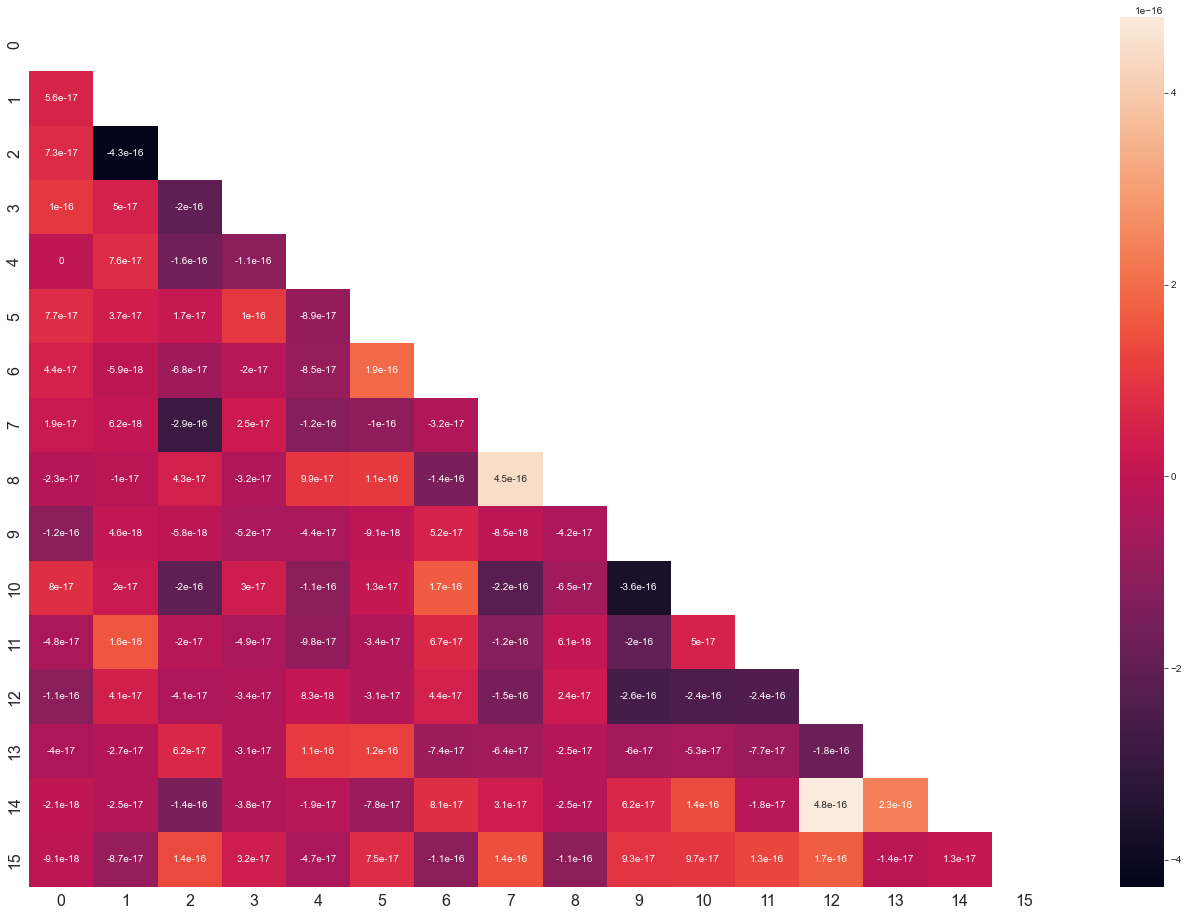

In [76]:
plt.figure(figsize=(23,16))
sns.heatmap(kpca_corr_matrix, mask=mask, annot=True)
# sns.set_style('white')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### t-SNE

- t-distributed Stochastic Neighbor Embedding
- It is recommended in the documentation of [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to lower the demension of data to 50 or less with `KernelPCA` before applying t-SNE.

#### Applying t-SNE to single variable data

In [ ]:
kpca = KernelPCA(n_components=50, kernel='rbf')
Single_kpca = kpca.fit_transform(tf_sst_data)
Single_kpca

array([[-3.86829371e-01,  1.65336604e-02, -2.16515023e-02, ...,
         1.25209790e-04, -1.18999062e-03,  5.32770662e-04],
       [-3.88743641e-01,  1.86547485e-02, -2.25250649e-02, ...,
         2.04230352e-03, -1.25030028e-03,  1.61741892e-03],
       [-3.87251306e-01,  1.65931972e-02, -2.20104365e-02, ...,
         1.02319567e-03,  6.08617059e-05,  3.55121542e-04],
       ...,
       [-2.77141364e-01, -6.93386581e-02, -5.63429960e-03, ...,
         3.28854023e-03,  8.95308323e-05, -3.86505668e-04],
       [-2.83699163e-01, -6.46425314e-02, -1.04811853e-02, ...,
         1.73578397e-03, -1.17691307e-03, -1.44792611e-03],
       [-2.86561850e-01, -6.35287605e-02, -8.44378687e-03, ...,
         1.70146300e-03, -4.52424250e-04, -1.84750199e-03]])

In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', perplexity=10)
Single_var_tsne = tsne.fit_transform(Single_kpca)
Single_var_tsne

/usr/local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


array([[ 54.59878   ,  -9.403902  ],
       [ 54.74504   ,  -9.94296   ],
       [ 55.316185  ,  -9.826422  ],
       [ 55.80025   ,  -9.564014  ],
       [ 55.002262  ,  -8.787589  ],
       [ 54.995186  ,  -7.5284057 ],
       [ 54.983013  ,  -6.7424164 ],
       [ 54.9398    ,  -6.1380315 ],
       [ 55.16335   ,  -5.3870006 ],
       [ 56.27596   ,  -4.4802003 ],
       [ 56.11391   ,  -4.3206935 ],
       [ 54.13691   ,  -4.032024  ],
       [ 53.815575  ,  -4.153048  ],
       [ 54.508595  ,  -2.9727948 ],
       [ 53.481308  ,  -2.8512504 ],
       [ 53.928726  ,  -1.9822793 ],
       [ 53.22748   ,  -1.9534764 ],
       [ 52.567783  ,  -1.9403661 ],
       [ 52.328262  ,  -1.0894333 ],
       [ 52.119392  ,  -0.80250025],
       [ 51.31761   ,   0.3277694 ],
       [ 50.868423  ,   0.9600361 ],
       [ 50.58689   ,   1.4047276 ],
       [ 50.03315   ,   2.3494236 ],
       [ 49.20326   ,   2.381571  ],
       [ 49.497597  ,   3.1495192 ],
       [ 49.06144   ,   3.7587318 ],
 

#### Applying t-SNE to real data

In [35]:
kpca = KernelPCA(n_components=50, kernel='rbf')
real_kpca = kpca.fit_transform(tf_data)
real_kpca

array([[ 0.18079048, -0.07575304, -0.05554408, ...,  0.01124047,
         0.00081747,  0.00855359],
       [ 0.18604405,  0.01755846, -0.02514849, ..., -0.00278301,
         0.00045732,  0.01690047],
       [ 0.18978488,  0.11251013,  0.01914892, ...,  0.02012844,
         0.00050619,  0.01889304],
       ...,
       [ 0.17797391,  0.24370379,  0.09322344, ..., -0.00978058,
         0.0032539 , -0.0003909 ],
       [ 0.19620549,  0.26354036,  0.17241536, ..., -0.00933879,
         0.00628311, -0.01055571],
       [ 0.19917055,  0.20128299,  0.26612819, ..., -0.01432498,
         0.00218311, -0.00498908]])

In [36]:
tsne = TSNE(n_components=3, learning_rate='auto', perplexity=10)
real_tsne = tsne.fit_transform(real_kpca)
real_tsne

/usr/local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


array([[ 10.271573 ,  -8.394453 ,   6.5205493],
       [ 10.400621 ,  -6.960171 ,   6.778926 ],
       [ 10.618963 ,  -5.62749  ,   6.612951 ],
       ...,
       [ -2.954189 , -15.052168 ,   3.9516368],
       [ -3.1865861, -14.996682 ,   3.4907663],
       [ -3.4165547, -14.609184 ,   2.627692 ]], dtype=float32)

In [37]:
df_real_tsne = pd.DataFrame(real_tsne)
tsne_corr_matrix = df_real_tsne.corr()
tsne_corr_matrix

,0,1,2
0,1.000000,-0.576293,0.650179
1,-0.576293,1.000000,-0.600548
2,0.650179,-0.600548,1.000000


In [47]:
mask = np.zeros_like(tsne_corr_matrix)
triangle = np.triu_indices_from(mask)
mask[triangle] = True
mask

array([[1., 1., 1.],
       [0., 1., 1.],
       [0., 0., 1.]])

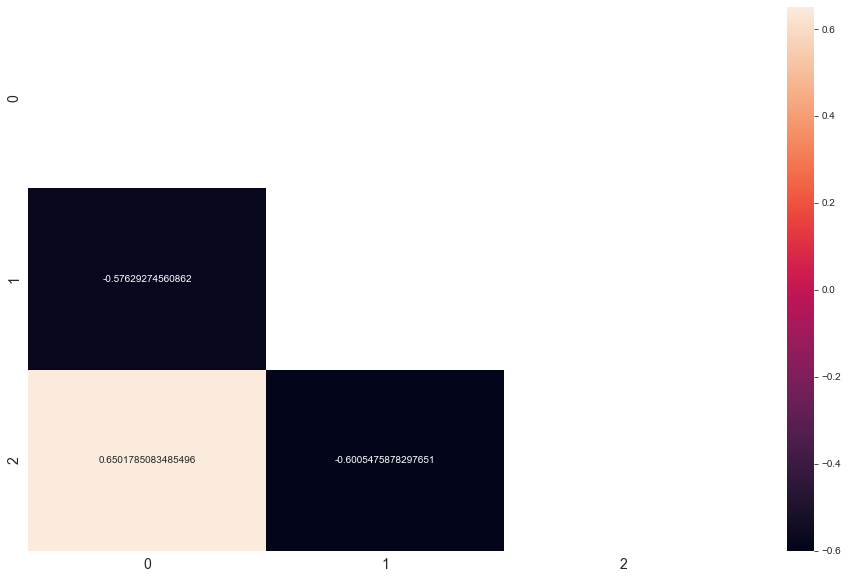

In [51]:
plt.figure(figsize=(16,10))
sns.heatmap(tsne_corr_matrix, mask=mask, annot=True, fmt='2' )
# sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Clustering 

#### Applying KMeans for `single variable` data with `KernelPCA`

In [ ]:
distortions = []
inertias = []
K = range(1,50, 2)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(Single_var_kpca)
    distortions.append(sum(np.min(cdist(Single_var_kpca, km.cluster_centers_,'euclidean'), axis=1)) / Single_var_kpca.shape[0])
    inertias.append(km.inertia_)


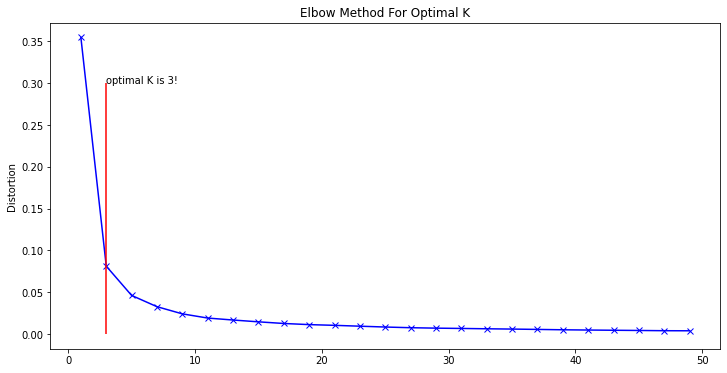

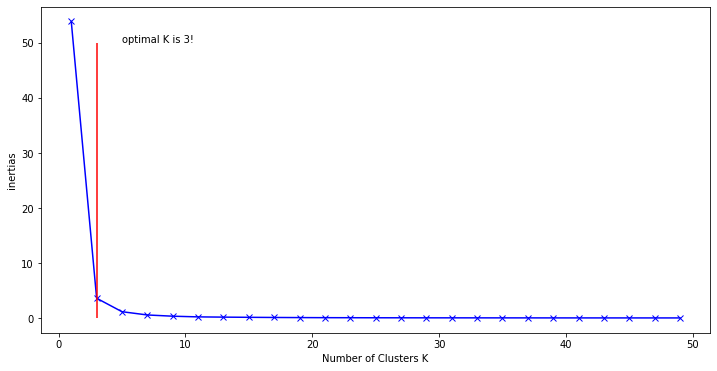

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.vlines(ymin=0, ymax=0.3, x=3, colors='red')
plt.text(x=3, y=0.3, s="optimal K is 3!")
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal K')
plt.show()


plt.plot(K, inertias, 'bx-')
plt.vlines(ymin=0, ymax=50, x=3, colors='red')
plt.text(x=5, y=50, s="optimal K is 3!")
plt.xlabel('Number of Clusters K')
plt.ylabel('inertias')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Single_var_kpca)
P = kmeans.predict(Single_var_kpca)
kpca_sst_labels =  kmeans.labels_
kpca_sst_frame = pd.DataFrame(Single_var_kpca)
kpca_sst_frame['Cluster'] = kpca_sst_labels
kpca_sst_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Applying KMeans for `real` data with `KernelPCA`

In [ ]:
distortions = []
inertias = []
K = range(1,70, 3)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(real_kpca)
    distortions.append(sum(np.min(cdist(real_kpca, km.cluster_centers_,'euclidean'), axis=1)) / real_kpca.shape[0])
    inertias.append(km.inertia_)


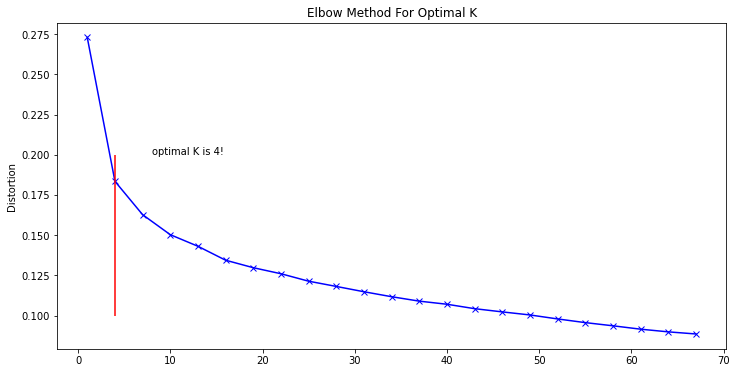

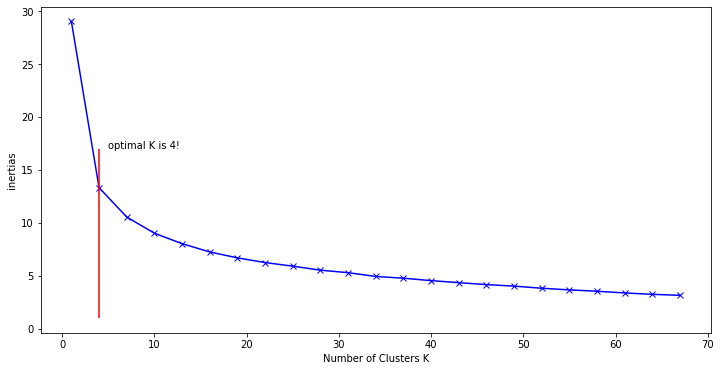

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.vlines(ymin=0.1, ymax=0.2, x=4, colors='red')
plt.text(x=8, y=0.2, s="optimal K is 4!")
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal K')
plt.show()


plt.plot(K, inertias, 'bx-')
plt.vlines(ymin=1, ymax=17, x=4, colors='red')
plt.text(x=5, y=17, s="optimal K is 4!")
plt.xlabel('Number of Clusters K')
plt.ylabel('inertias')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(real_kpca)
P = kmeans.predict(real_kpca)
kpca_labels =  kmeans.labels_
kpca_frame = pd.DataFrame(real_kpca)
kpca_frame['Cluster'] = kpca_labels
kpca_labels

array([0, 2, 2, 2, 2, 3, 3, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

#### Applying KMeans for `single variable` data with `t-SNE`

In [ ]:
distortions = []
inertias = []
K = range(1,50, 2)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(Single_var_tsne)
    distortions.append(sum(np.min(cdist(Single_var_tsne, km.cluster_centers_,'euclidean'), axis=1)) / Single_var_tsne.shape[0])
    inertias.append(km.inertia_)

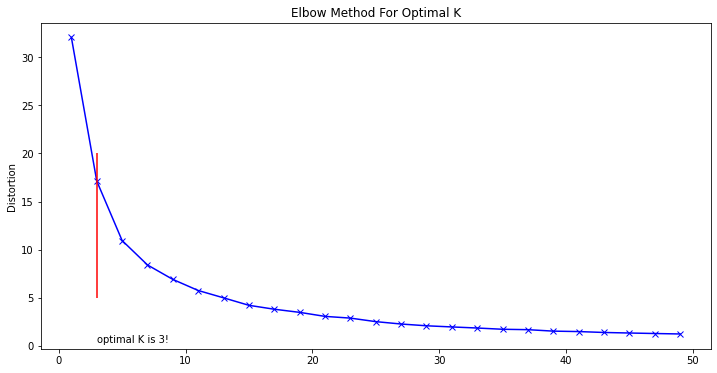

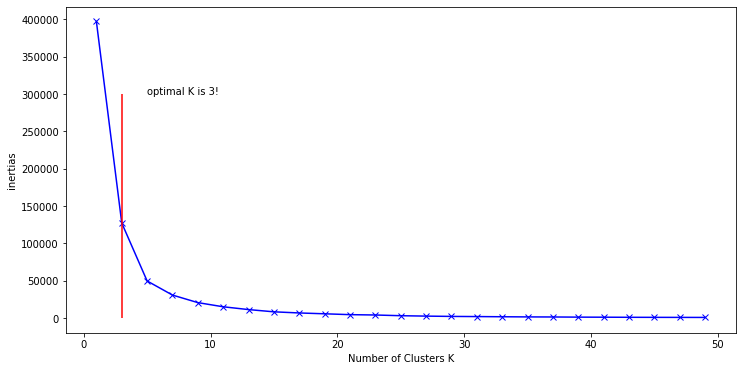

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.vlines(ymin=5, ymax=20, x=3, colors='red')
plt.text(x=3, y=20, s="optimal K is 3!")
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal K')
plt.show()


plt.plot(K, inertias, 'bx-')
plt.vlines(ymin=0, ymax=300000, x=3, colors='red')
plt.text(x=5, y=300000, s="optimal K is 3!")
plt.xlabel('Number of Clusters K')
plt.ylabel('inertias')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Single_var_tsne)
P = kmeans.predict(Single_var_tsne)
tsne_sst_labels =  kmeans.labels_
tsne_sst_frame = pd.DataFrame(Single_var_tsne)
tsne_sst_frame['Cluster'] = tsne_sst_labels
tsne_sst_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

#### Applying KMeans for `real` data with `t-SNE`

In [ ]:
distortions = []
inertias = []
K = range(1,70, 3)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(real_tsne)
    distortions.append(sum(np.min(cdist(real_tsne, km.cluster_centers_,'euclidean'), axis=1)) / real_tsne.shape[0])
    inertias.append(km.inertia_)

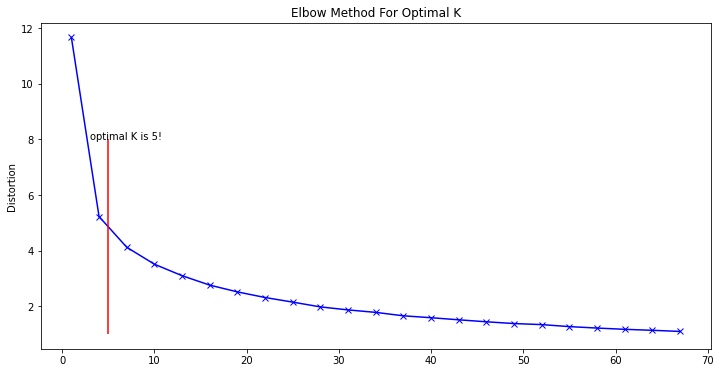

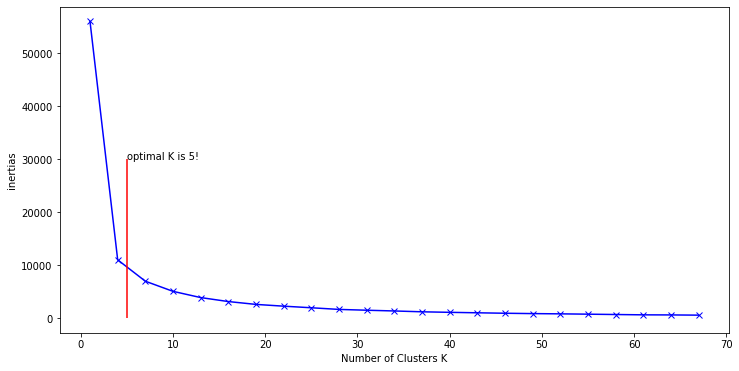

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.vlines(ymin=1, ymax=8, x=5, colors='red')
plt.text(x=3, y=8, s="optimal K is 5!")
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal K')
plt.show()


plt.plot(K, inertias, 'bx-')
plt.vlines(ymin=0, ymax=30000, x=5, colors='red')
plt.text(x=5, y=30000, s="optimal K is 5!")
plt.xlabel('Number of Clusters K')
plt.ylabel('inertias')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(real_tsne)
P = kmeans.predict(real_tsne)
tsne_labels =  kmeans.labels_
tsne_frame = pd.DataFrame(real_tsne)
tsne_frame['Cluster'] = tsne_labels
tsne_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,

## Evaluation and Visualization

Applying RMSE , Silhouette Coefficient and Davies-Bouldin scores to evaluate the clustering.

##### Silhouette Coefficient score

- The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.

- The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.


##### Davies-Bouldin score

- The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.

- The minimum score is zero, with lower values indicating better clustering.

##### - `Single variable` data with `KernelPCA` ( n_features=2  and n_cluster=2 )

In [ ]:
print('RMSE is: ')
print( st_evaluation.st_rmse(data_single_var,kpca_sst_labels))

print("Silhouette Coefficient score is ", silhouette_score(tf_sst_data, kpca_sst_labels))

print("Davies-Bouldin score is ", davies_bouldin_score(tf_sst_data, kpca_sst_labels))

RMSE is: 
      0     1
0  0.18  0.71
1  0.71  0.18
Silhouette Coefficient score is  0.6876292288723352
Davies-Bouldin score is  0.4253510395368853


In [ ]:
visualization.make_Csv_cluster(kpca_sst_labels,'kpca_sst.csv')

total clusters:  2
varid: sst
var_range: [286.9919318332959, 299.0668423730597]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: UserWarning: The following kwargs were not used by contour: 'linewidth'


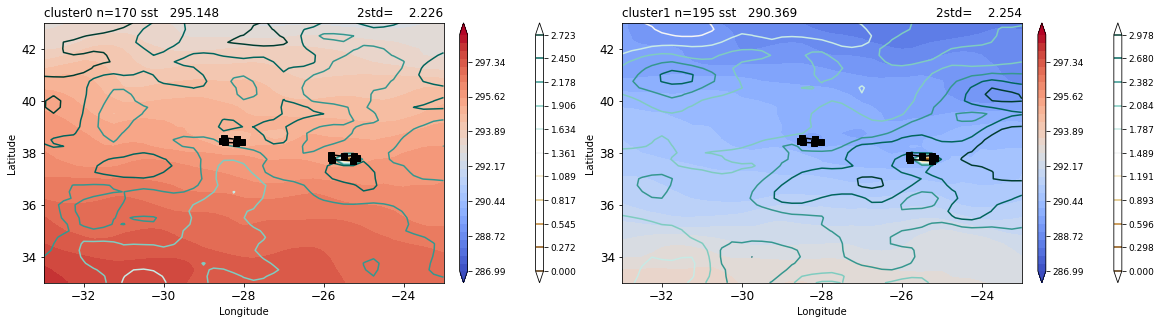

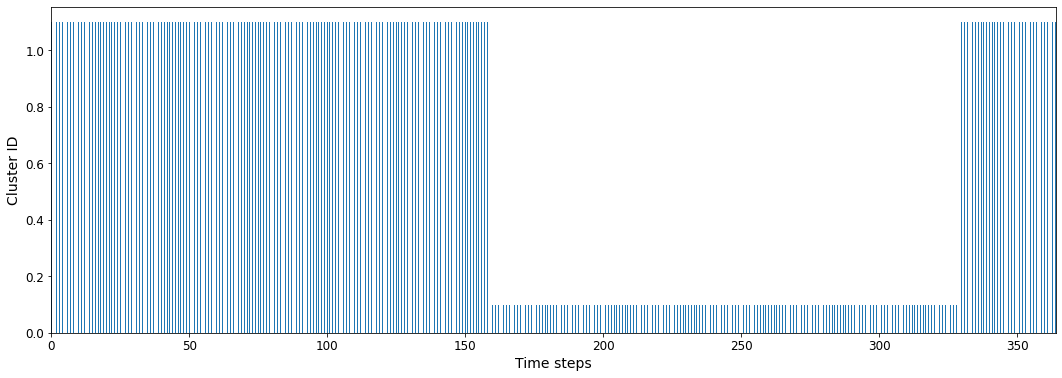

In [5]:
visualization.visualization('./single_var_ERA5_meteo_sfc_2021_daily.nc','./kpca_sst.csv','./coast.txt',['sst'])

##### - `Single variable` data with `t-SNE` ( n_features=2  and n_cluster=2 )

In [ ]:
print('RMSE is: ')
print( st_evaluation.st_rmse(data_single_var,tsne_sst_labels))

print("Silhouette Coefficient score is ", silhouette_score(tf_sst_data, tsne_sst_labels))

print("Davies-Bouldin score is ", davies_bouldin_score(tf_sst_data, tsne_sst_labels))

RMSE is: 
       0      1
0  27.81  44.78
1  44.78  23.82
Silhouette Coefficient score is  0.6845315425778982
Davies-Bouldin score is  0.42721976395502287


In [ ]:
visualization.make_Csv_cluster(tsne_sst_labels,'tsne_sst.csv')

total clusters:  2
varid: sst
var_range: [286.9919318332959, 299.0668423730597]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: UserWarning: The following kwargs were not used by contour: 'linewidth'


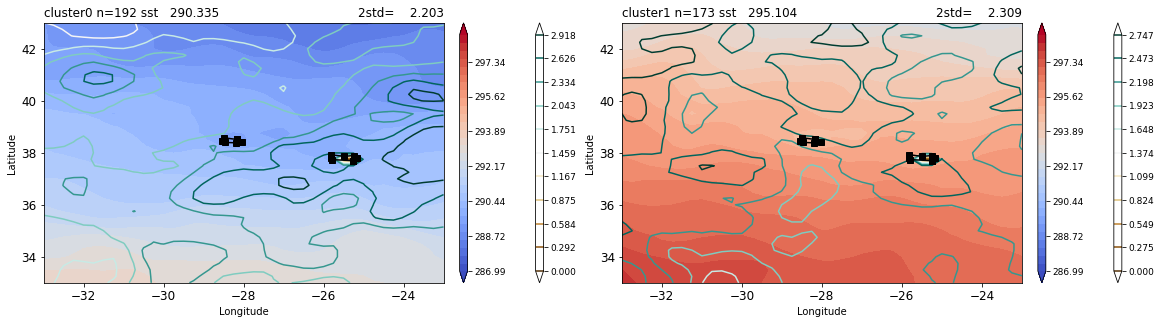

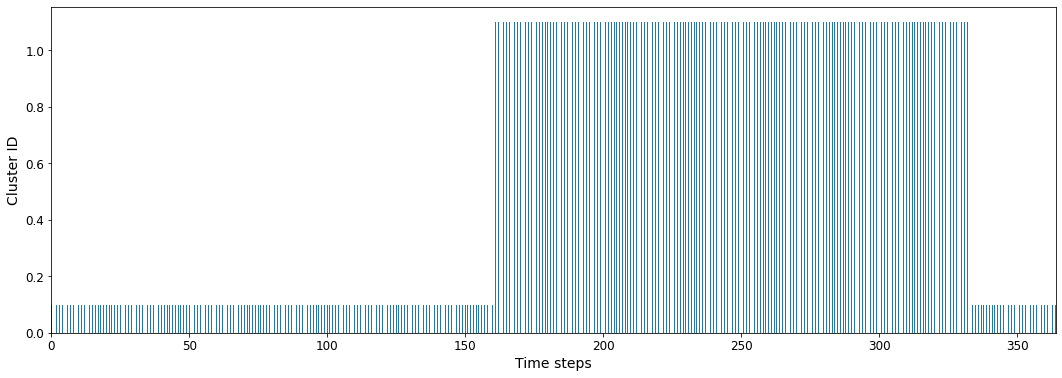

In [6]:
visualization.visualization('./single_var_ERA5_meteo_sfc_2021_daily.nc','./tsne_sst.csv','./coast.txt',['sst'])

##### - `Real` data with `kernelPCA` ( n_features=16  and n_cluster=4 )

In [ ]:
print('RMSE is: ')
print( st_evaluation.st_rmse(data,kpca_labels))

print("Silhouette Coefficient score is ", silhouette_score(tf_data, kpca_labels))

print("Davies-Bouldin score is ", davies_bouldin_score(tf_data, kpca_labels))

RMSE is: 
      0     1     2     3
0  0.18  0.34  0.22  0.33
1  0.34  0.17  0.39  0.48
2  0.22  0.39  0.18  0.33
3  0.33  0.48  0.33  0.25
Silhouette Coefficient score is  0.2925533975812865
Davies-Bouldin score is  1.3944034105101697


In [ ]:
visualization.make_Csv_cluster(kpca_labels,'kpca_real.csv')

total clusters:  4
varid: sst
var_range: [286.9919318332959, 299.0668423730597]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: UserWarning: The following kwargs were not used by contour: 'linewidth'


varid: t2m
var_range: [-0.08280723076385484, -0.07839707801928061]
varid: u10
var_range: [-15.129702662479593, 16.82725476413482]
varid: v10
var_range: [-14.294945017569995, 14.039669939743764]
varid: sshf
var_range: [-43.41541985801895, 175.22246693947238]
varid: sp
var_range: [985.3787786916515, 1035.1150602330122]


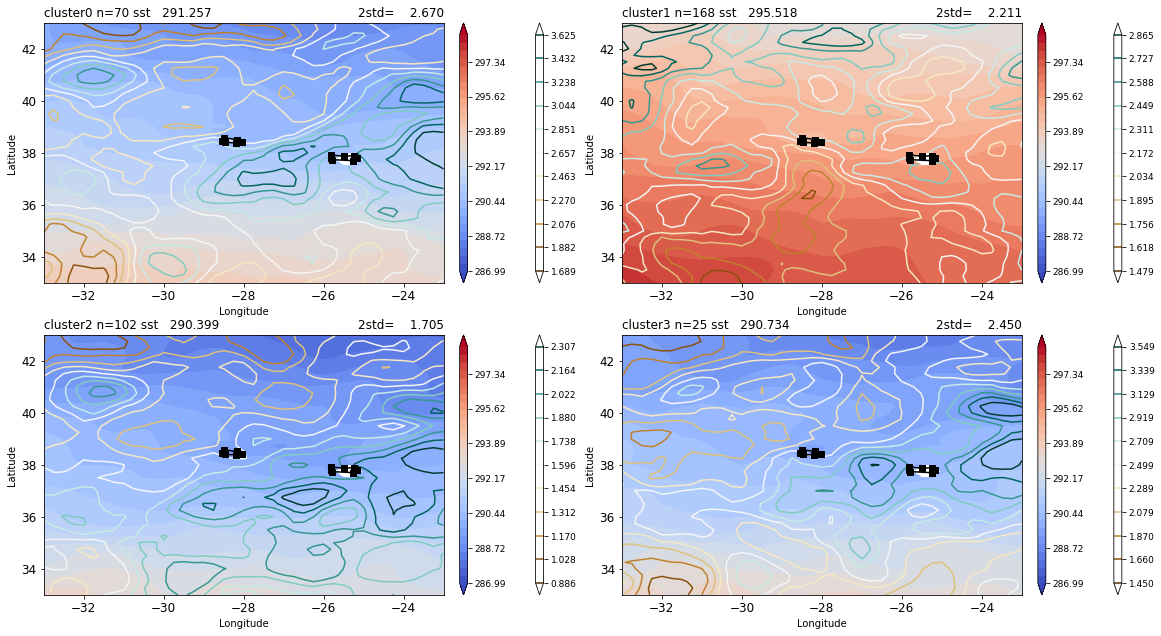

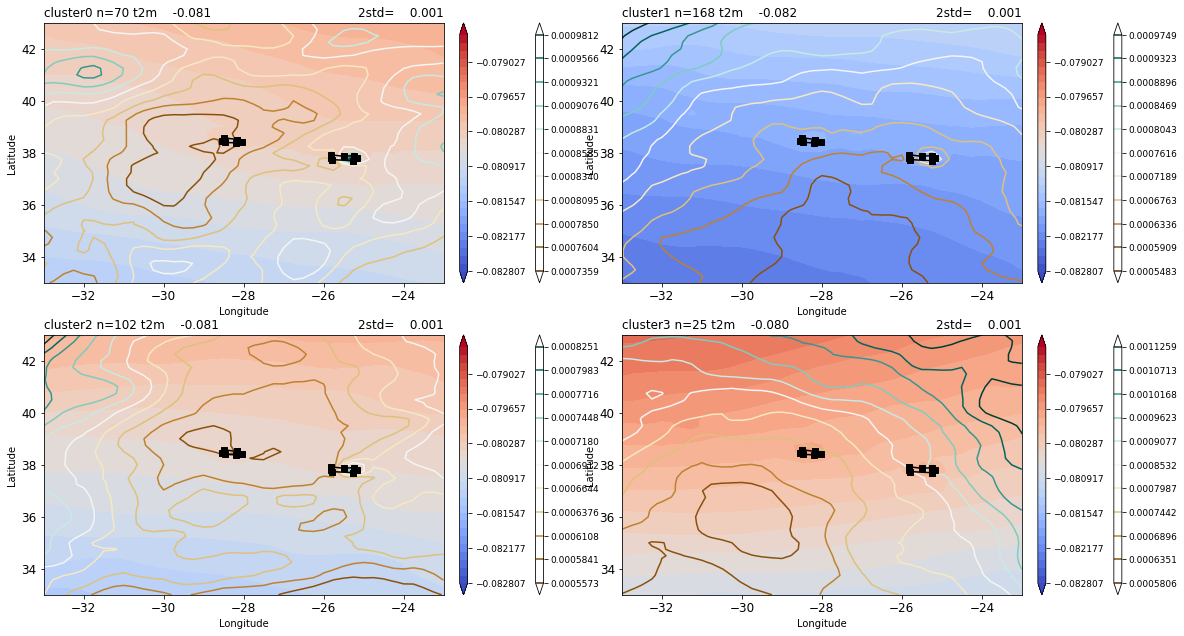

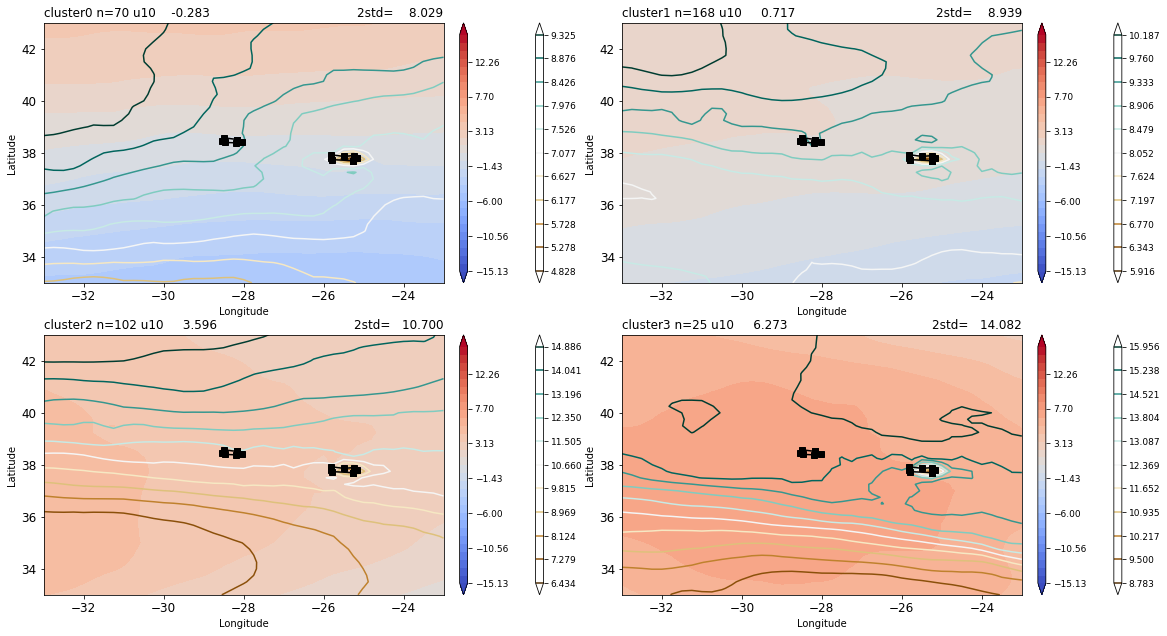

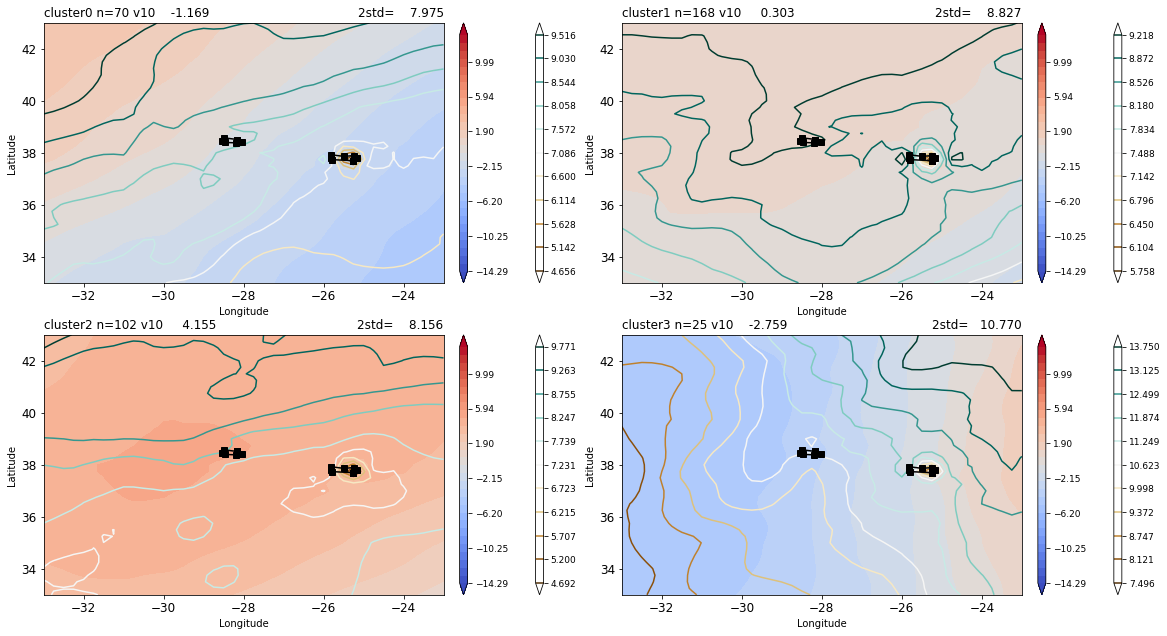

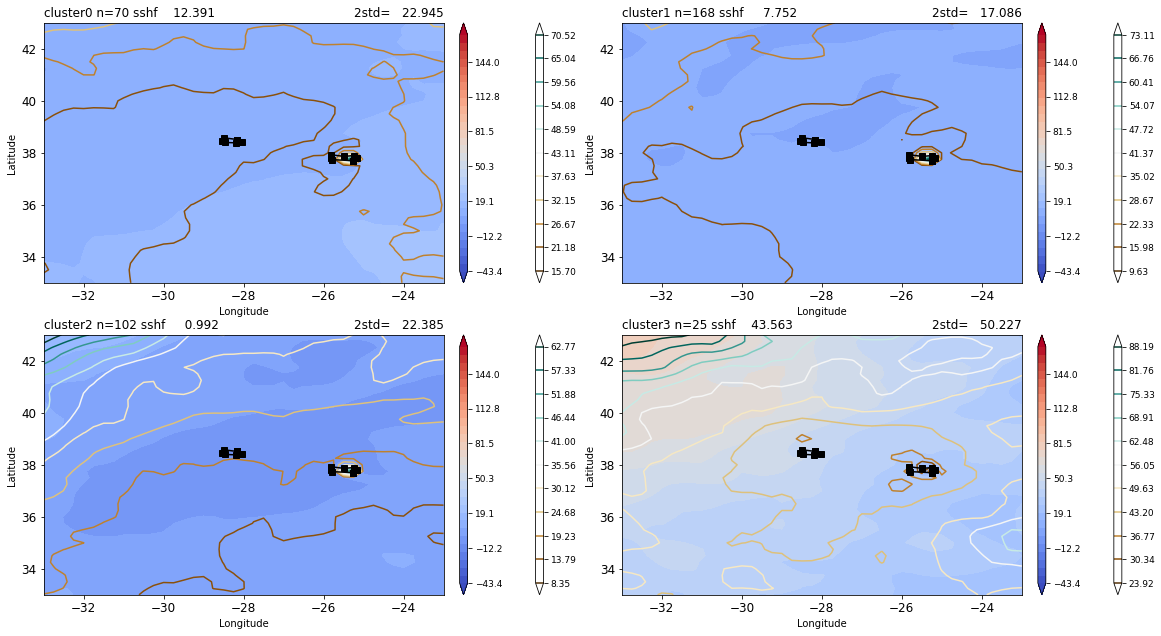

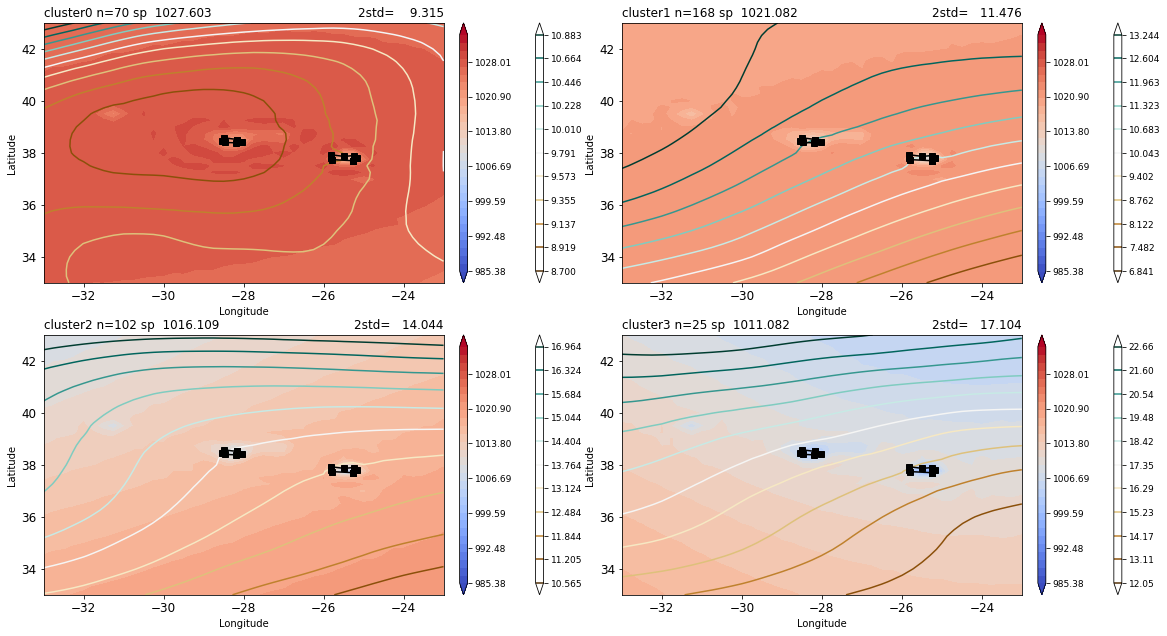

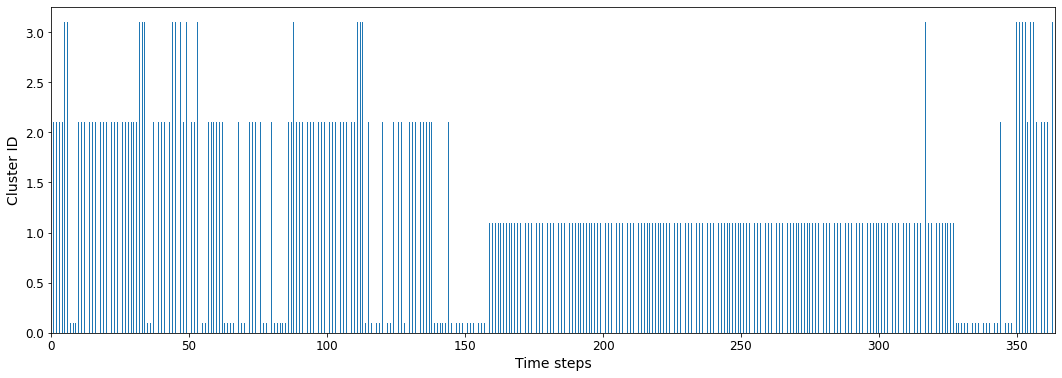

In [7]:
visualization.visualization('./ERA5_meteo_sfc_2021_daily.nc','./kpca_real.csv','./coast.txt')

##### - `Real` data with `t-SNE` ( n_features=3  and n_cluster=3 )

In [ ]:
print('RMSE is: ')
print( st_evaluation.st_rmse(data,tsne_labels))

print("Silhouette Coefficient score is ", silhouette_score(tf_data, tsne_labels))

print("Davies-Bouldin score is ", davies_bouldin_score(tf_data, tsne_labels))

RMSE is: 
       0      1      2
0   7.01  24.45  13.12
1  24.45   5.68  11.78
2  13.12  11.78   6.01
Silhouette Coefficient score is  0.21184668694289982
Davies-Bouldin score is  1.6172760716515489


In [ ]:
visualization.make_Csv_cluster(tsne_labels,'tsne_real.csv')

total clusters:  3
varid: sst
var_range: [286.9919318332959, 299.0668423730597]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: UserWarning: The following kwargs were not used by contour: 'linewidth'


varid: t2m
var_range: [-0.08280723076385484, -0.07839707801928061]
varid: u10
var_range: [-15.129702662479593, 16.82725476413482]
varid: v10
var_range: [-14.294945017569995, 14.039669939743764]
varid: sshf
var_range: [-43.41541985801895, 175.22246693947238]
varid: sp
var_range: [985.3787786916515, 1035.1150602330122]


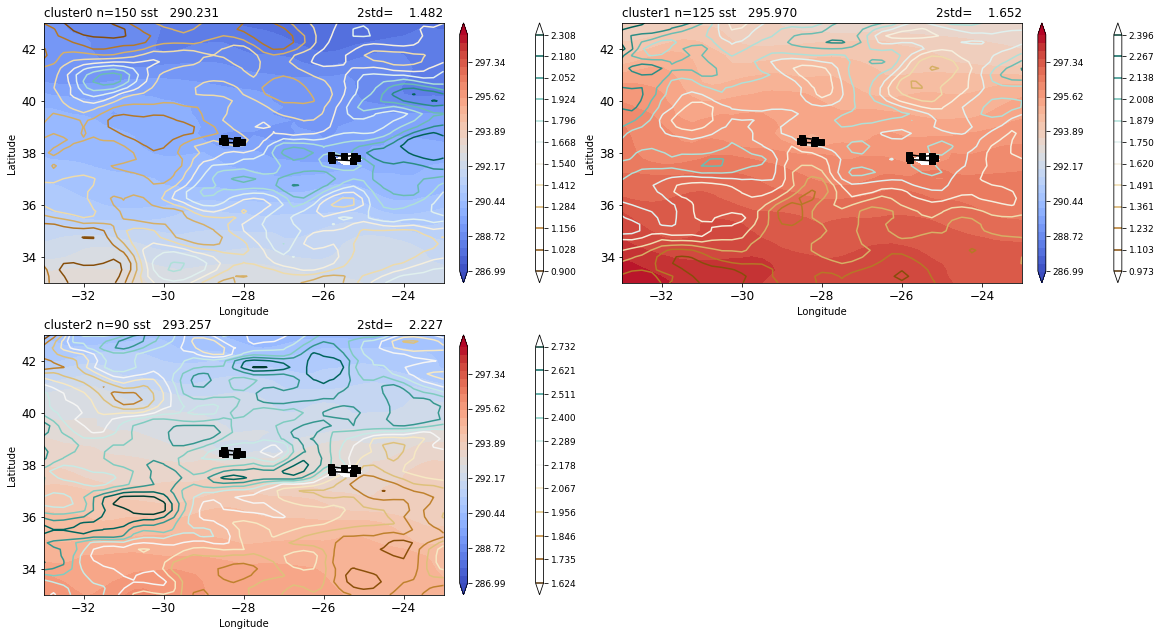

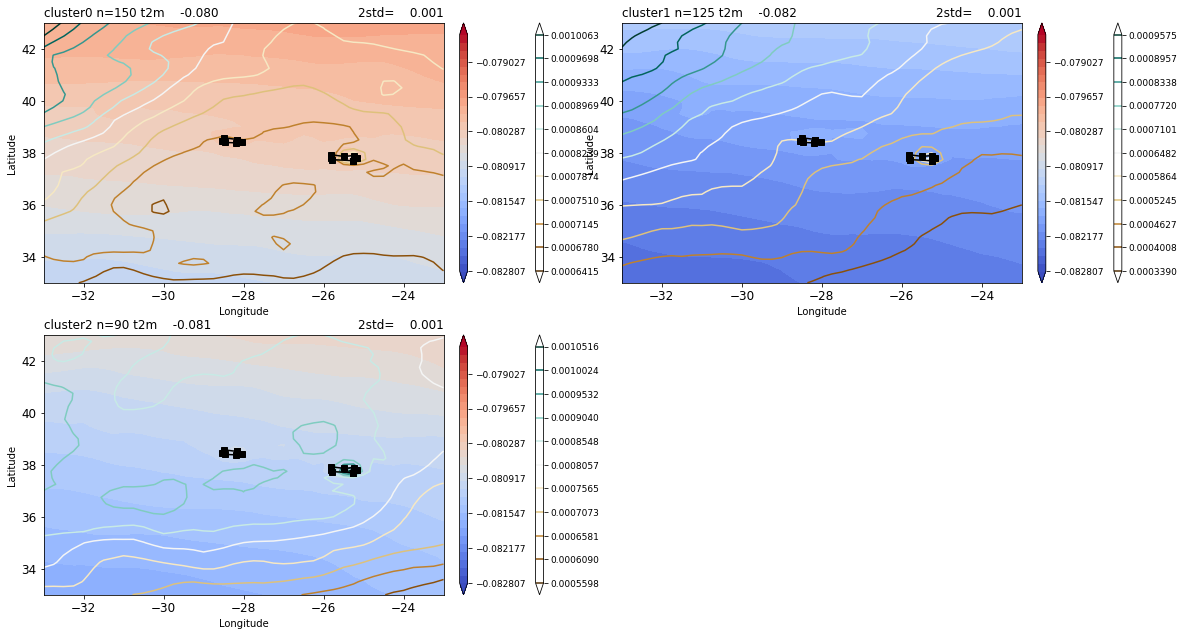

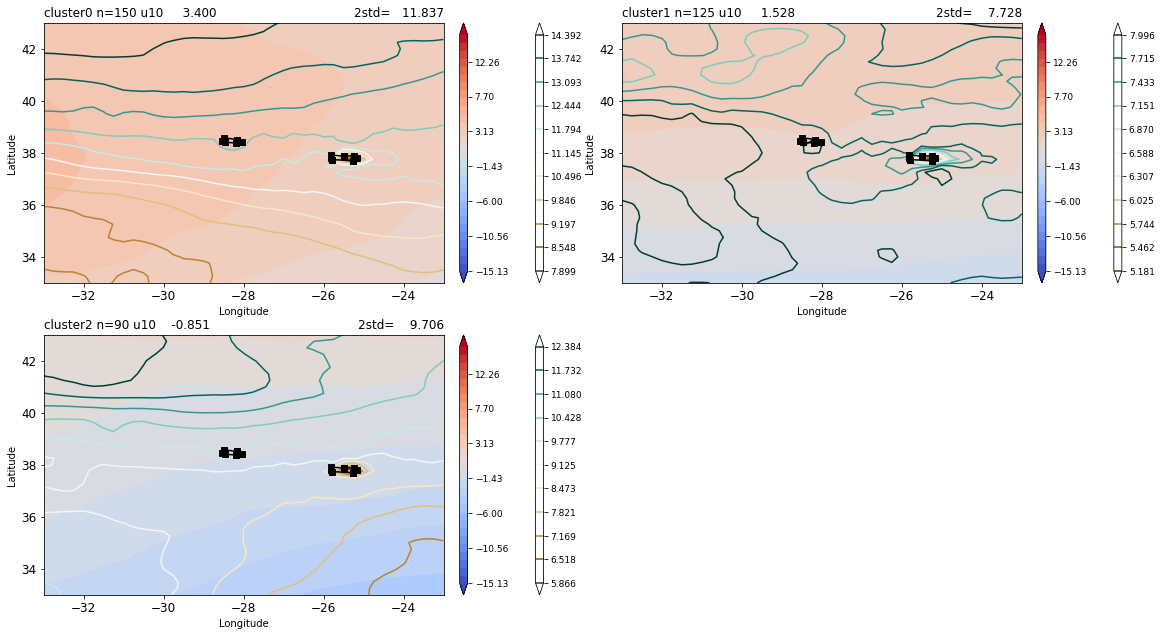

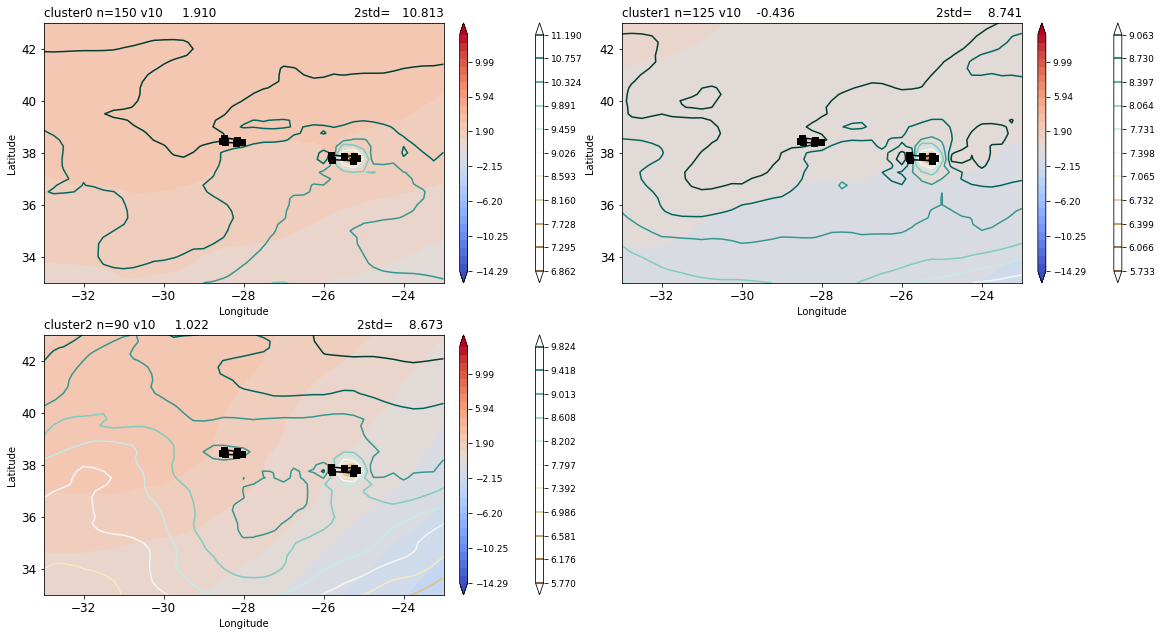

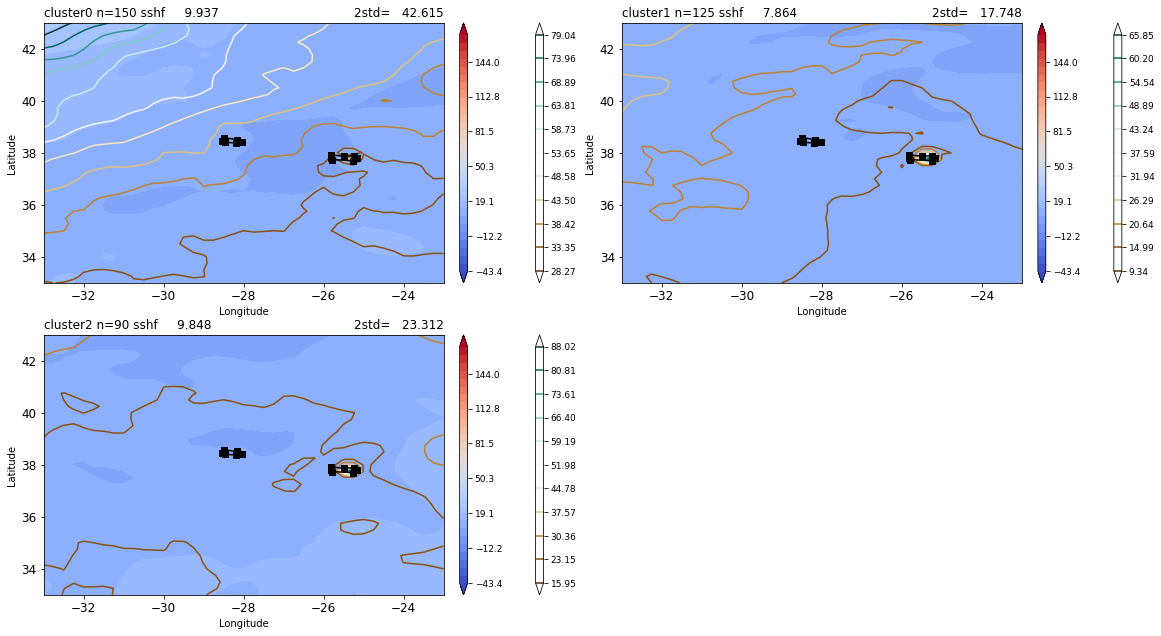

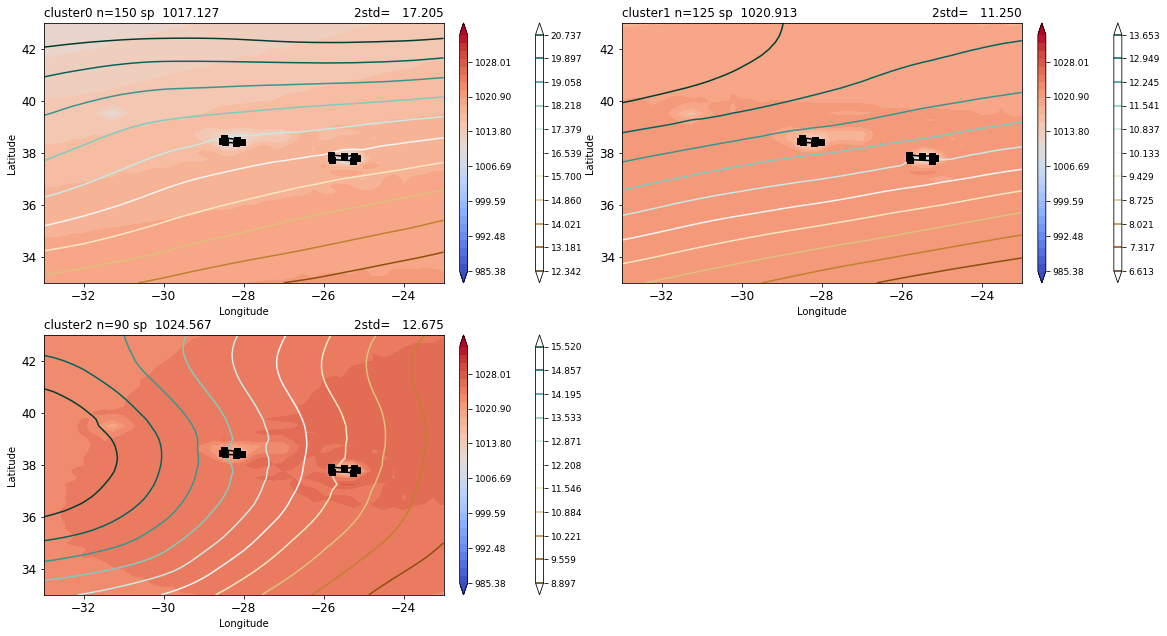

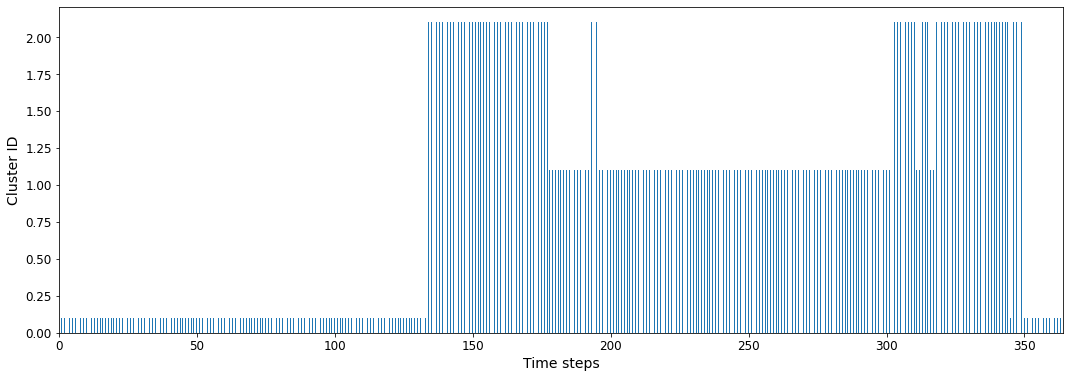

In [8]:
visualization.visualization('./ERA5_meteo_sfc_2021_daily.nc','./tsne_real.csv','./coast.txt')